In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm

from generation.dataset.dataset import get_detector_event_df, get_detector_event_signal, get_detector_event_df_path

In [2]:
# !pip install ../..

In [2]:
_DETECTOR = 0
_EVENTS_NUM = 200


detector_signals = np.array([get_detector_event_signal(_DETECTOR, event) 
                    for event in range(_EVENTS_NUM)])

### WGAN

In [3]:
import torch
from torch import nn
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

from generation.dataset.dataset_pytorch import SignalsDataset
from generation.train.wgan import run_train, generate_new_signal

In [65]:
SAMPLE_SIZE = 65

# Train params
NUM_EPOCHS = 1000
BATCH_SIZE = 32
LEARNING_RATE = 1e-4
LATENT_DIM = 8
PRINT_EACH = 50
VERBOSE = 1
NO_SAVE = True

In [66]:
def unify_shape(data):
    min_values = np.min(data, axis=1)
    max_values = np.max(data, axis=1)
    data = (data  - min_values[:, None]) / (max_values - min_values)[:, None]
    return data

def transform(data):
    new_data = np.fft.rfft(data)
    norms = np.abs(new_data)
    angles = np.angle(new_data)
    return norms, angles

def inverse(norms, angles):
    return np.real(np.fft.irfft(norms * np.exp(1j * angles)))

class Scaler:
    def __init__(self):
        pass
    
    def scale(self, data):
        self.min_value = np.min(data)
        self.max_value = np.max(data)
        new_data = (data - self.min_value) / (self.max_value - self.min_value)
        return new_data

    def unscale(self, data):
        new_data = data * (self.max_value - self.min_value) + self.min_value
        return new_data


def get_dataset(data):
    scaler = Scaler()
    data = scaler.scale(data)
    dataset = SignalsDataset(data)
    return dataset, scaler, data


def test_transform(new_norms, new_angles):
    norms = norms_scaler.unscale(new_norms)
    angles = angles_scaler.unscale(new_angles)
    inverse_noises = inverse(norms, angles)
    assert np.allclose(inverse_noises, origin_noises)


origin_data = detector_signals.copy()
data = unify_shape(origin_data)
data = data[~np.isnan(data).any(axis=1)]
origin_noises = data - np.mean(data, axis=0)
norms, angles = transform(origin_noises)
norms_dataset, norms_scaler, norms = get_dataset(norms)
angles_dataset, angles_scaler, angles = get_dataset(angles)

/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


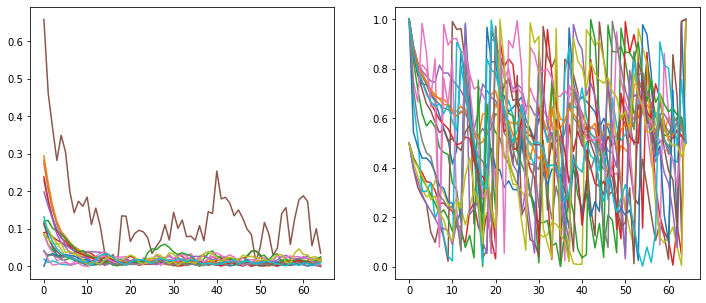

In [67]:
_PLOTS_NUM = 20

f, ax = plt.subplots(1, 2, figsize=(12, 5))

for idx in range(_PLOTS_NUM):
    ax[0].plot(norms[idx])
    ax[1].plot(angles[idx])
plt.show()

epoch-0; D_loss: -0.00037821754813194275; G_loss: -0.008028745651245117


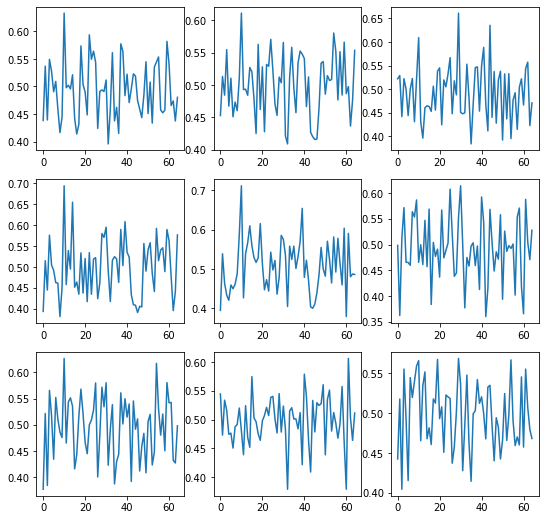

epoch-50; D_loss: -0.002615608274936676; G_loss: -0.004373166244477034


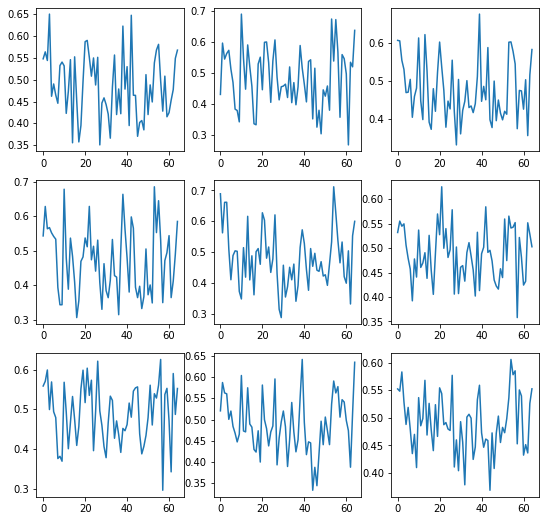

epoch-100; D_loss: -0.003125651739537716; G_loss: -0.009648648090660572


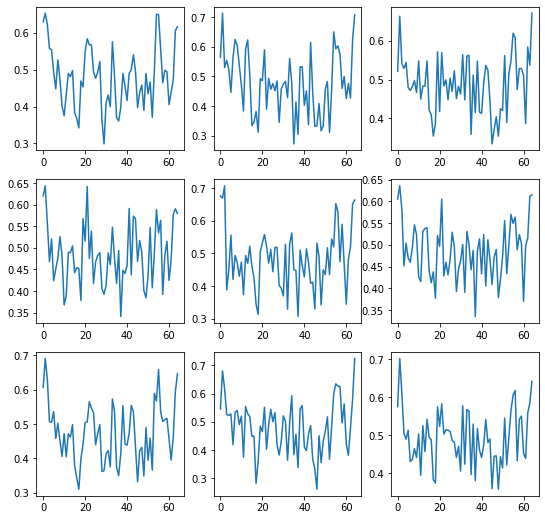

epoch-150; D_loss: -0.002118786796927452; G_loss: -0.010349296033382416


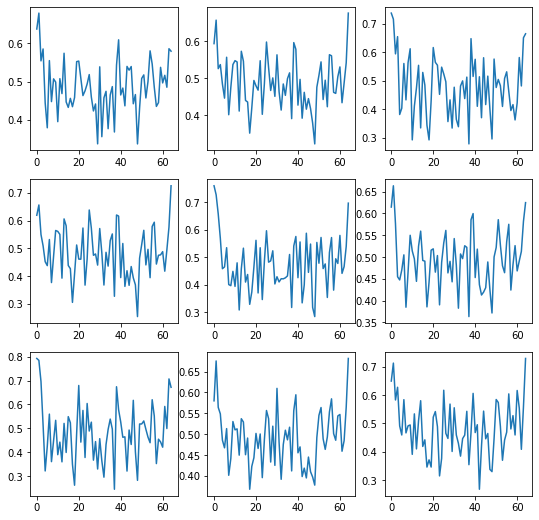

epoch-200; D_loss: -0.0034407712519168854; G_loss: -0.01066416036337614


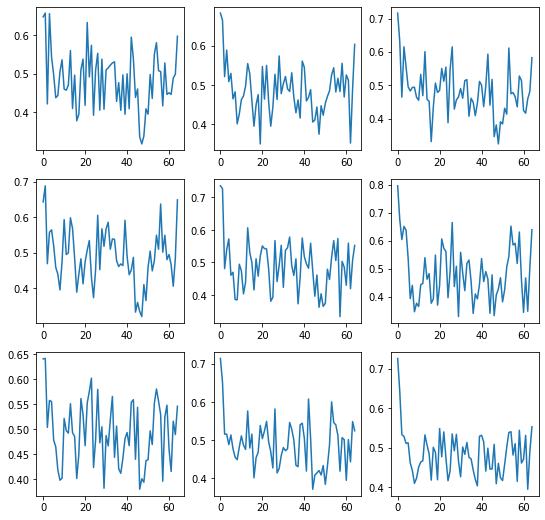

epoch-250; D_loss: -0.006112538743764162; G_loss: -0.004358465783298016


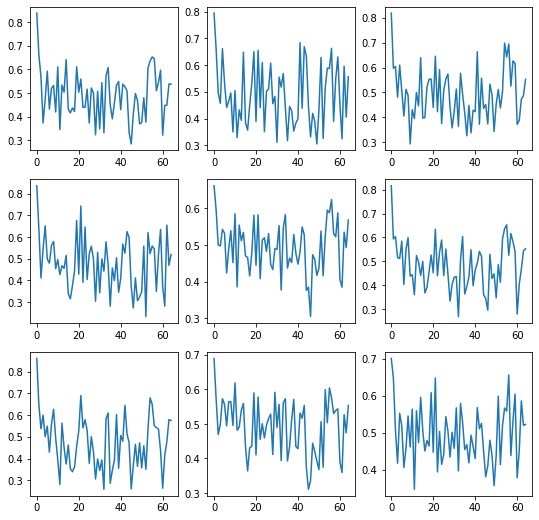

epoch-300; D_loss: -0.0014954470098018646; G_loss: -0.006023318972438574


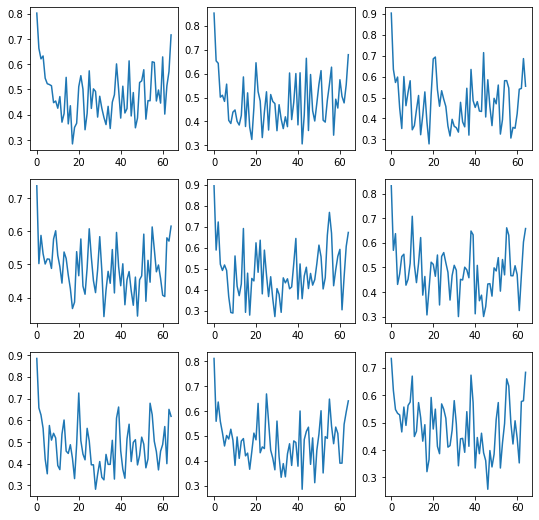

epoch-350; D_loss: -0.006464830599725246; G_loss: -0.007184747606515884


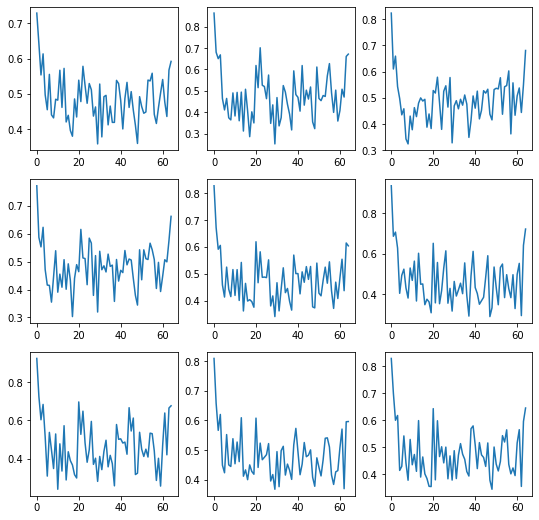

epoch-400; D_loss: -0.0035128621384501457; G_loss: -0.00816413201391697


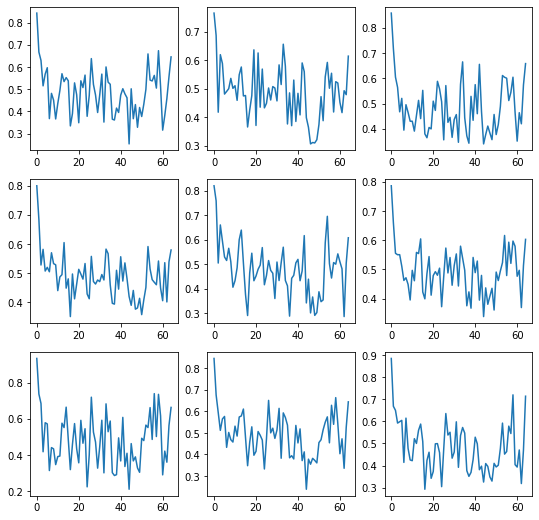

epoch-450; D_loss: -0.004344922956079245; G_loss: -0.0006846704054623842


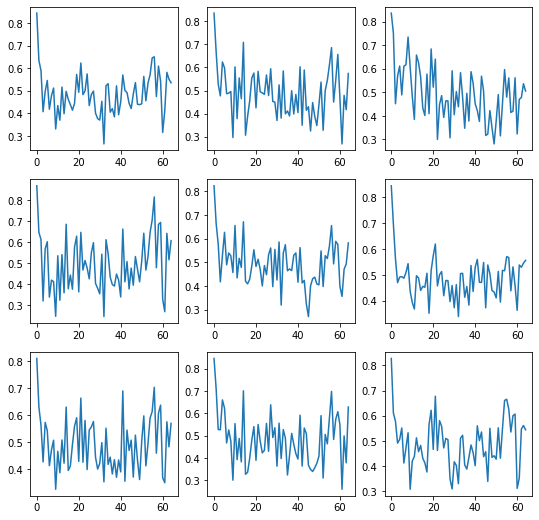

epoch-500; D_loss: -0.002767588011920452; G_loss: -0.0065457820892333984


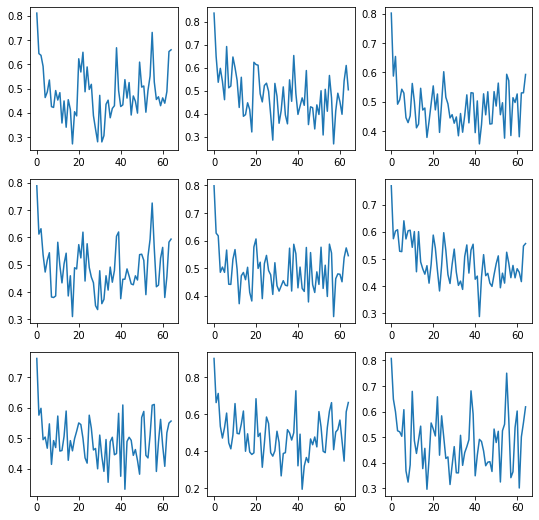

epoch-550; D_loss: -0.005617415066808462; G_loss: -0.006304887123405933


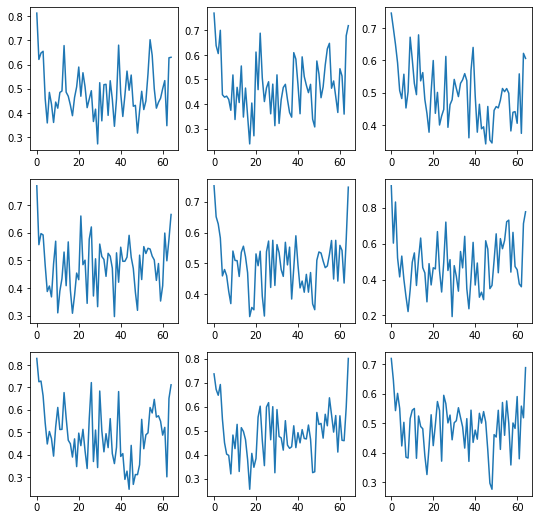

epoch-600; D_loss: -0.0015378212556242943; G_loss: -0.008235421031713486


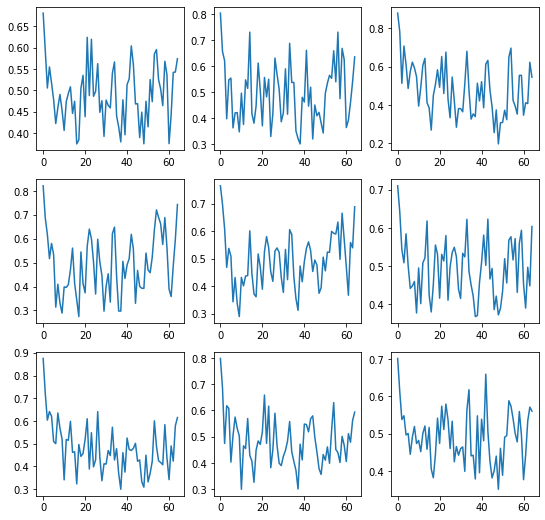

epoch-650; D_loss: -0.004491068422794342; G_loss: -0.0012930654920637608


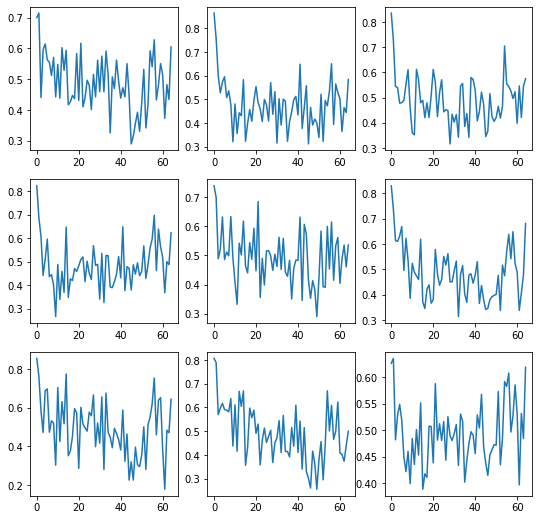

epoch-700; D_loss: -0.001659417524933815; G_loss: -0.008233166299760342


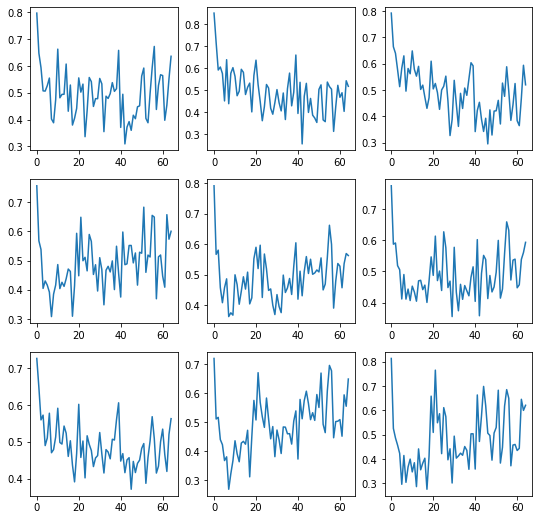

epoch-750; D_loss: -0.007313304115086794; G_loss: -0.00594209972769022


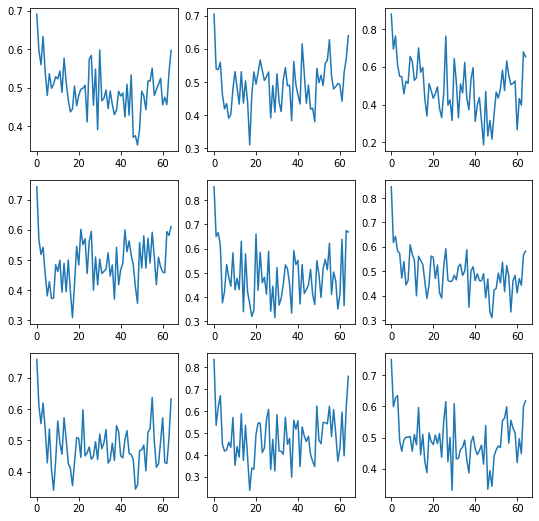

epoch-800; D_loss: -0.0016867108643054962; G_loss: -0.009990688413381577


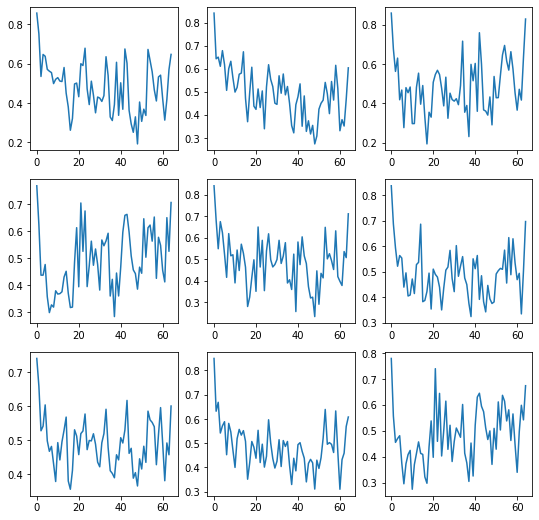

epoch-850; D_loss: -0.007019931450486183; G_loss: -0.002905299887061119


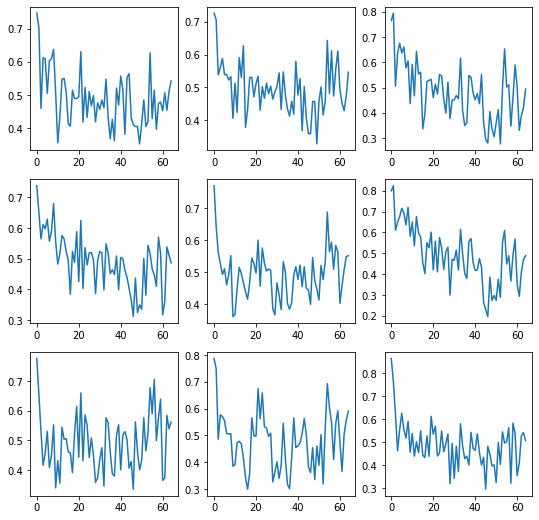

epoch-900; D_loss: -0.0012962454929947853; G_loss: -0.008094126358628273


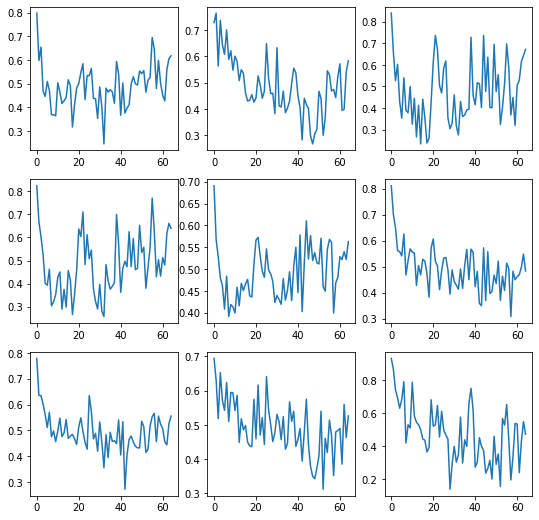

epoch-950; D_loss: -0.004359632730484009; G_loss: -0.003284935839474201


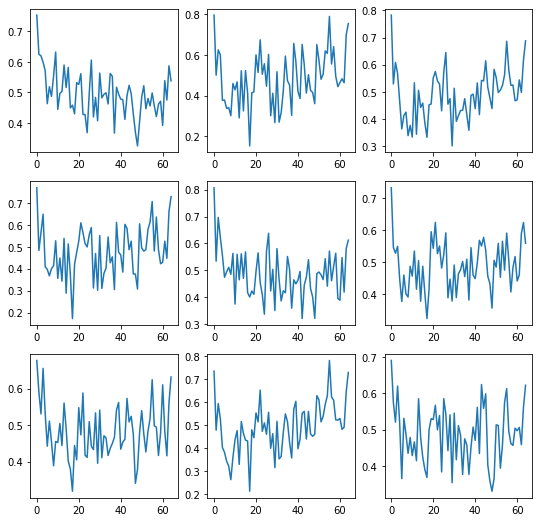

epoch-0; D_loss: 0.002279343083500862; G_loss: -0.012433065101504326


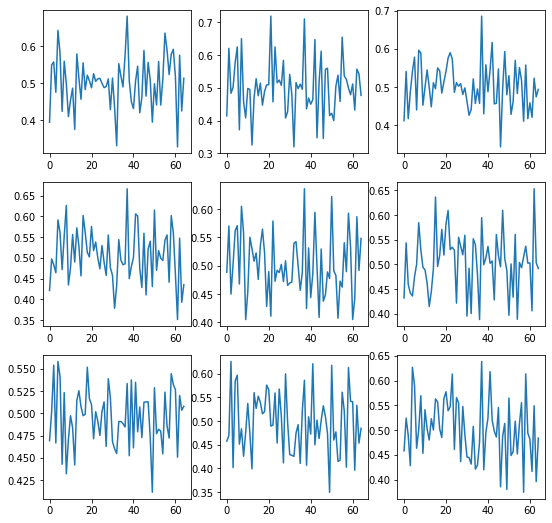

epoch-50; D_loss: -0.0736628845334053; G_loss: 0.06937958300113678


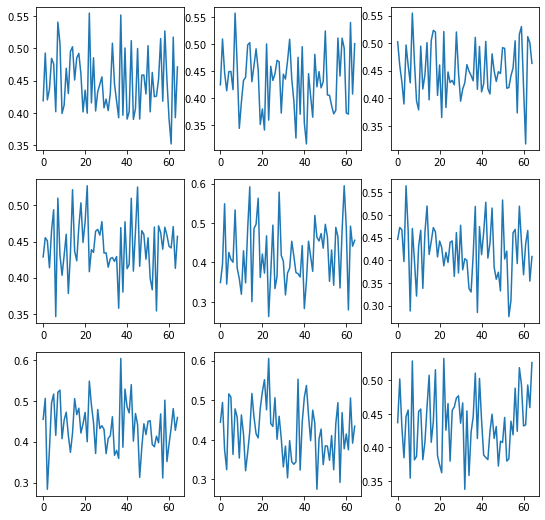

epoch-100; D_loss: -0.06496788561344147; G_loss: 0.057759322226047516


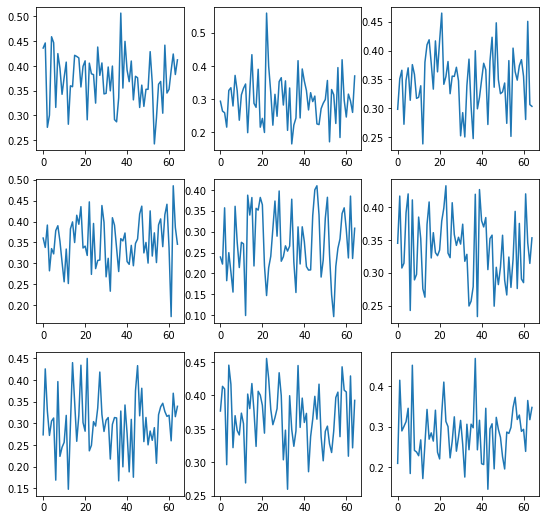

epoch-150; D_loss: -0.04655086621642113; G_loss: 0.046666380017995834


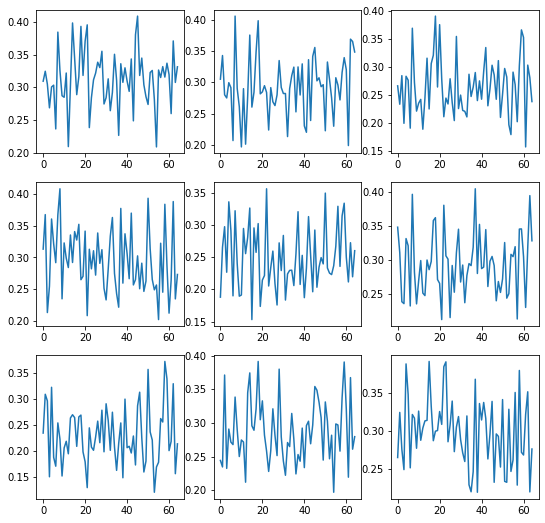

epoch-200; D_loss: -0.04024270921945572; G_loss: 0.03530147299170494


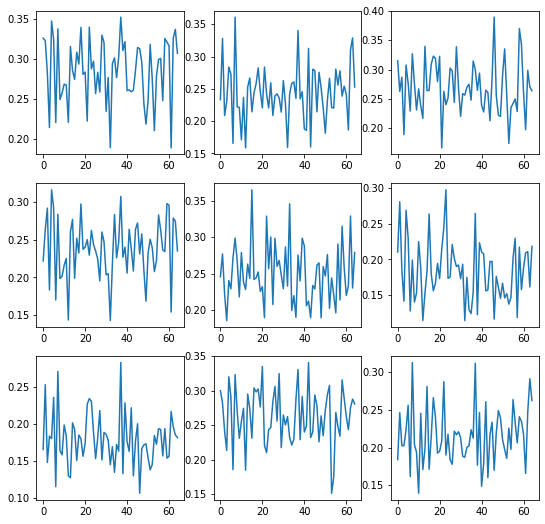

epoch-250; D_loss: -0.0276988223195076; G_loss: 0.02410997822880745


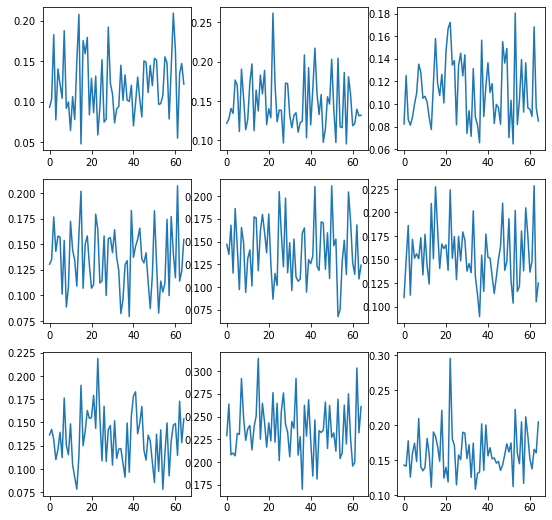

epoch-300; D_loss: -0.023535318672657013; G_loss: 0.018227118998765945


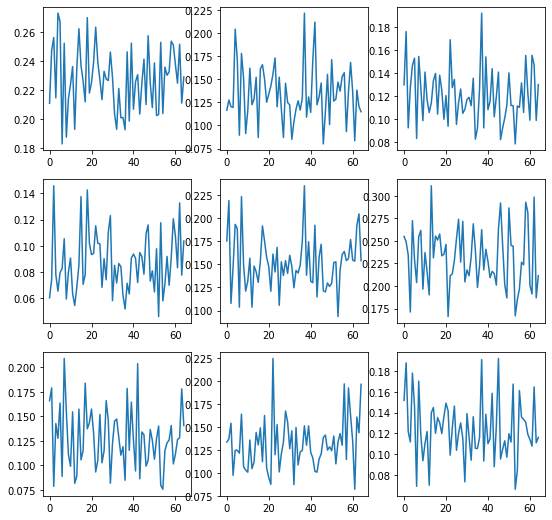

epoch-350; D_loss: -0.015359833836555481; G_loss: 0.011221766471862793


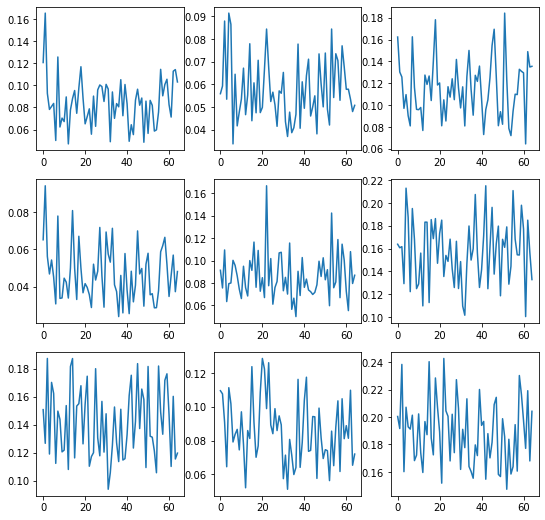

epoch-400; D_loss: -0.009839100763201714; G_loss: 0.00653049536049366


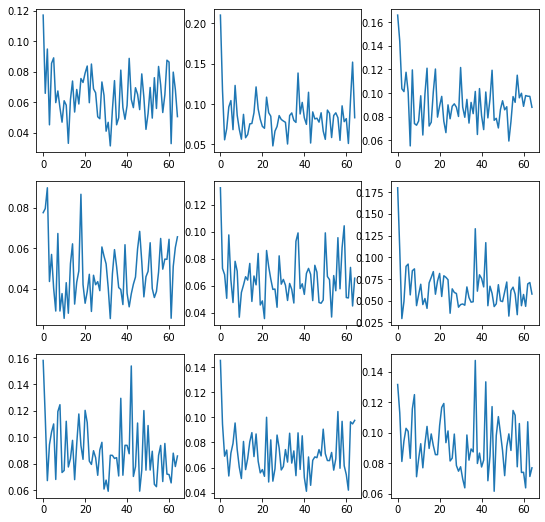

epoch-450; D_loss: -0.012291238643229008; G_loss: 0.002791810780763626


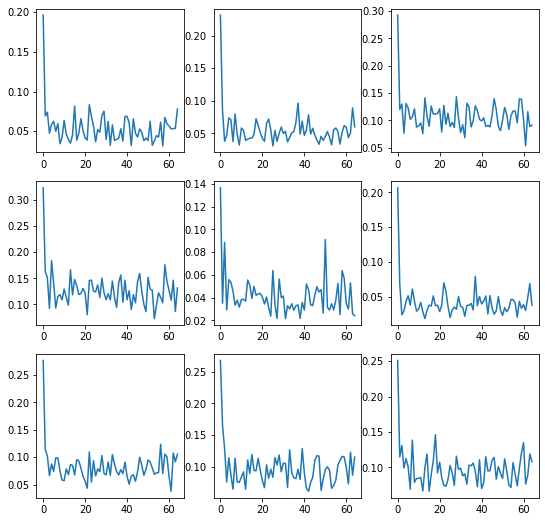

epoch-500; D_loss: -0.0060598766431212425; G_loss: 0.000410895561799407


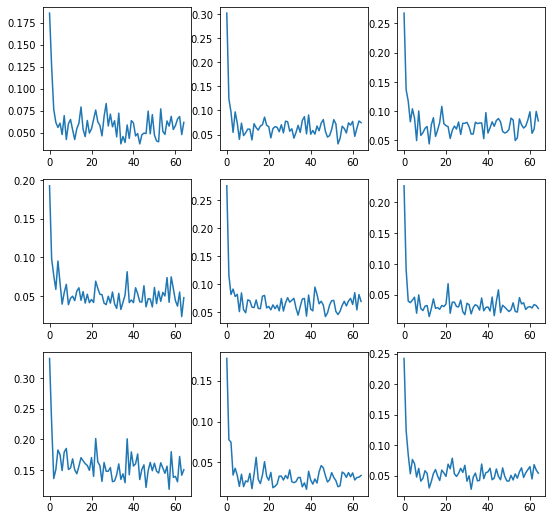

epoch-550; D_loss: -0.003844849532470107; G_loss: 0.0006899032741785049


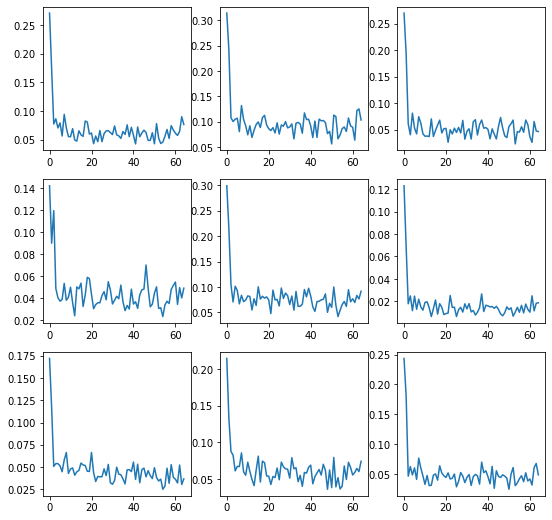

epoch-600; D_loss: -0.0030723416712135077; G_loss: -0.002254412043839693


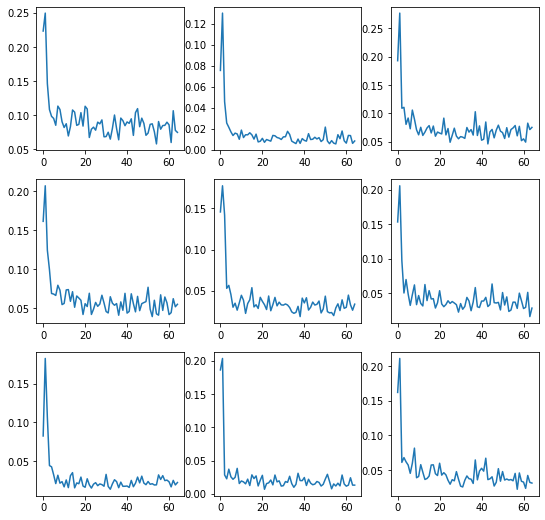

epoch-650; D_loss: -0.0024365074932575226; G_loss: -0.00450927997007966


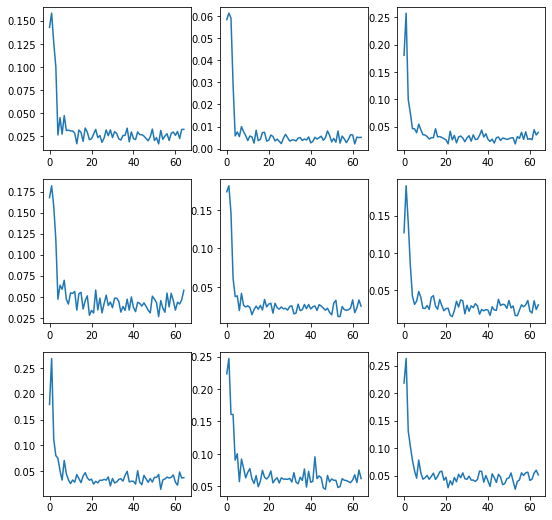

epoch-700; D_loss: -0.0018472960218787193; G_loss: -0.0037820981815457344


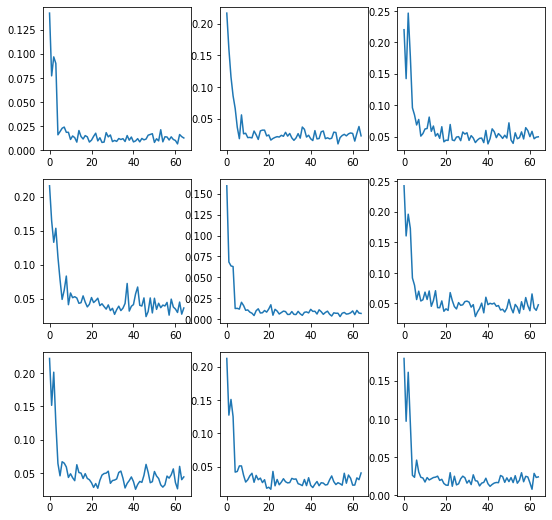

epoch-750; D_loss: 0.0003871363587677479; G_loss: -0.004798374138772488


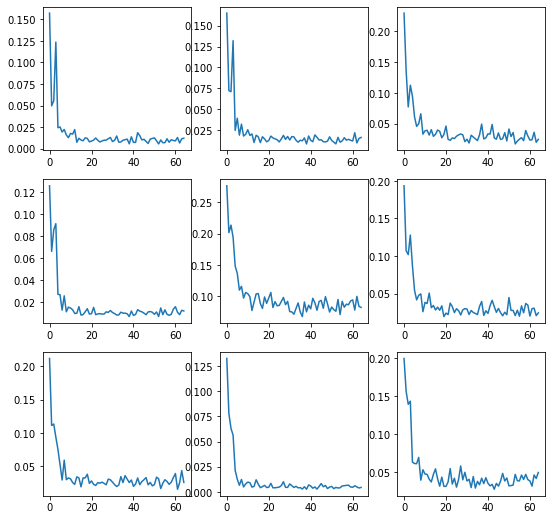

epoch-800; D_loss: 0.0008670864626765251; G_loss: -0.007422799710184336


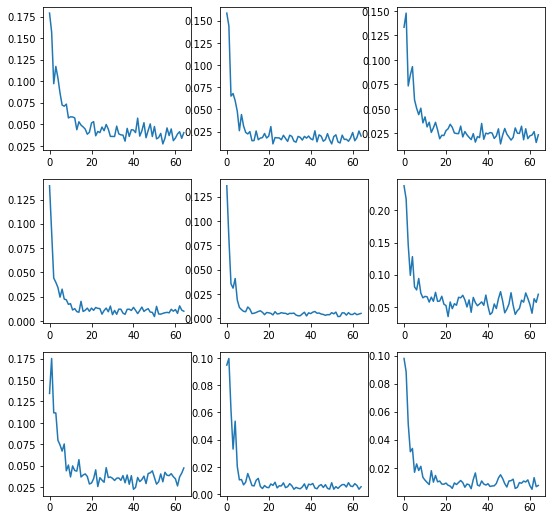

epoch-850; D_loss: 0.0003160061314702034; G_loss: -0.008889500051736832


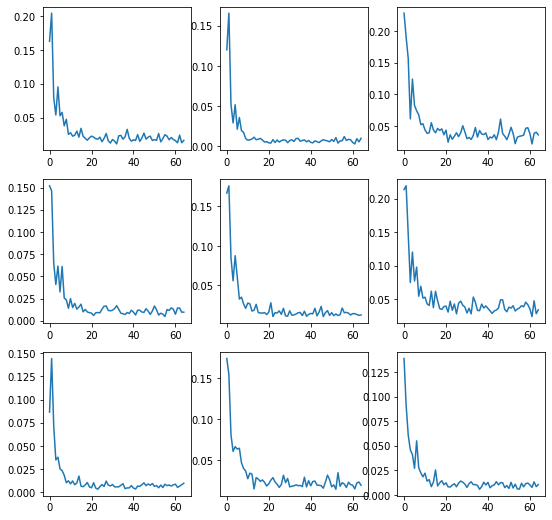

epoch-900; D_loss: 0.00013874657452106476; G_loss: -0.009160769172012806


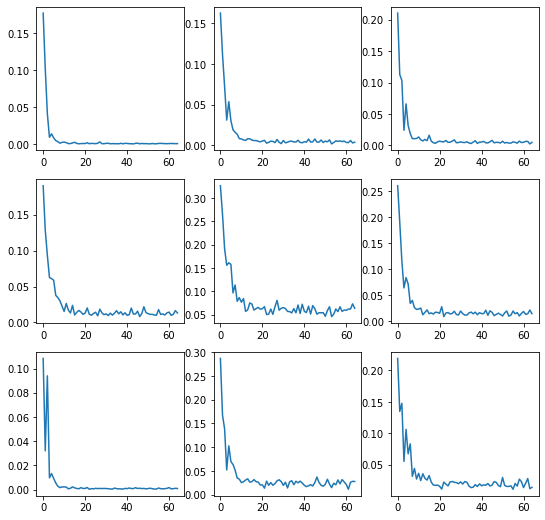

epoch-950; D_loss: 6.973743438720703e-06; G_loss: -0.0092380465939641


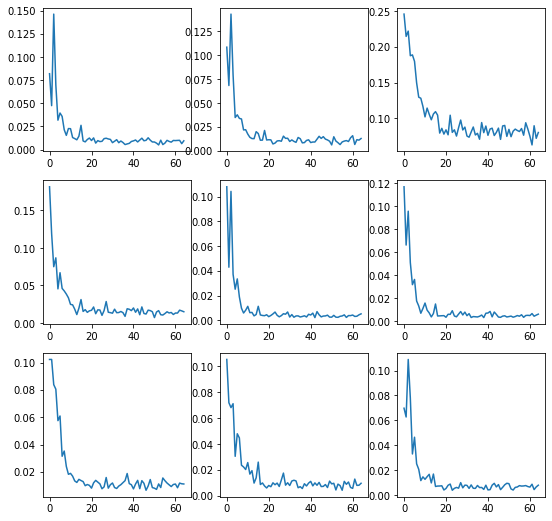

In [68]:
angles_generator = run_train(angles_dataset, \
          latent_dim=LATENT_DIM, \
          sample_size=SAMPLE_SIZE, \
          learning_rate=LEARNING_RATE, \
          num_epochs=NUM_EPOCHS, \
          batch_size=BATCH_SIZE, \
          print_each=PRINT_EACH, \
          verbose=VERBOSE, \
          no_save=NO_SAVE)

norms_generator = run_train(norms_dataset, \
          latent_dim=LATENT_DIM, \
          sample_size=SAMPLE_SIZE, \
          learning_rate=LEARNING_RATE, \
          num_epochs=NUM_EPOCHS, \
          batch_size=BATCH_SIZE, \
          print_each=PRINT_EACH, \
          verbose=VERBOSE, \
          no_save=NO_SAVE)

In [69]:
def get_random_signal(data):
    return data[np.random.choice(range(len(data)))]

def get_closest(signal, data):
    diffs = np.mean((data - signal) ** 2, axis=1)
    return data[np.argmin(diffs)]

def inspect_results(generated, origin, rows_num=3, cols_num=3):
    f, ax = plt.subplots(rows_num, cols_num, figsize=(12, 12))

    for i in range(rows_num * cols_num):
        generated_el = get_random_signal(generated)
        closest_origin = get_closest(generated_el, origin)
        ax[i // rows_num][i % cols_num].plot(generated_el, alpha=0.7)
        ax[i // rows_num][i % cols_num].plot(closest_origin, alpha=0.7)
        ax[i // rows_num][i % cols_num].legend(['Generated', 'Origin'])
    plt.show()

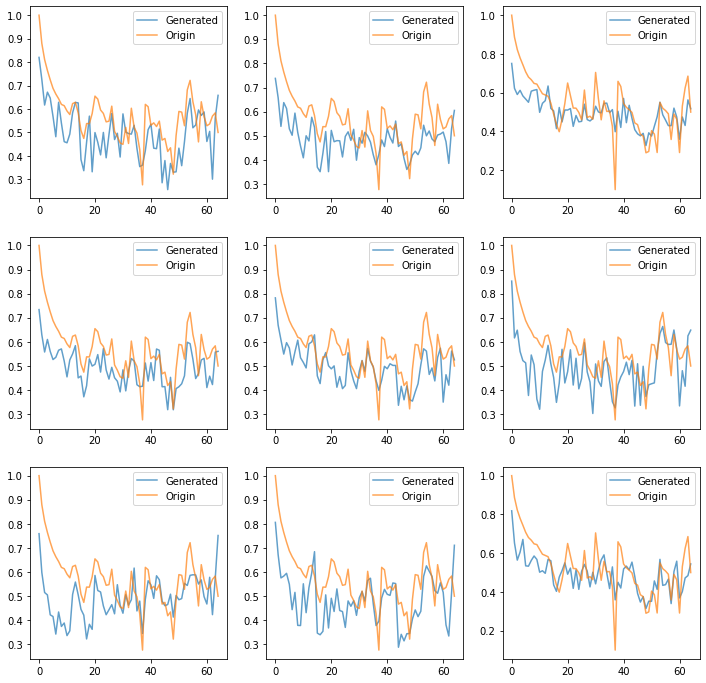

In [70]:
generated_angles = np.array([generate_new_signal(angles_generator)[0] for i in range(len(data))])
inspect_results(generated_angles, angles)

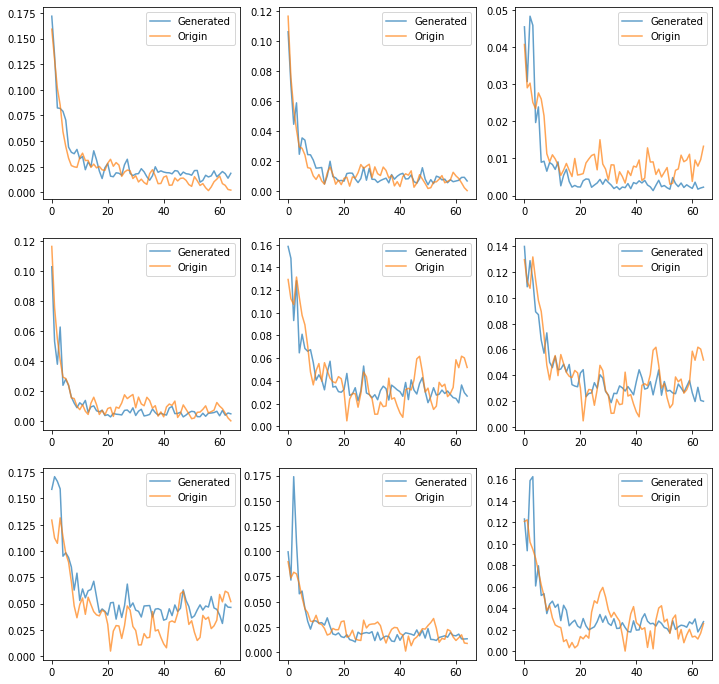

In [71]:
generated_norms = np.array([generate_new_signal(norms_generator)[0] for i in range(len(data))])
inspect_results(generated_norms, norms)

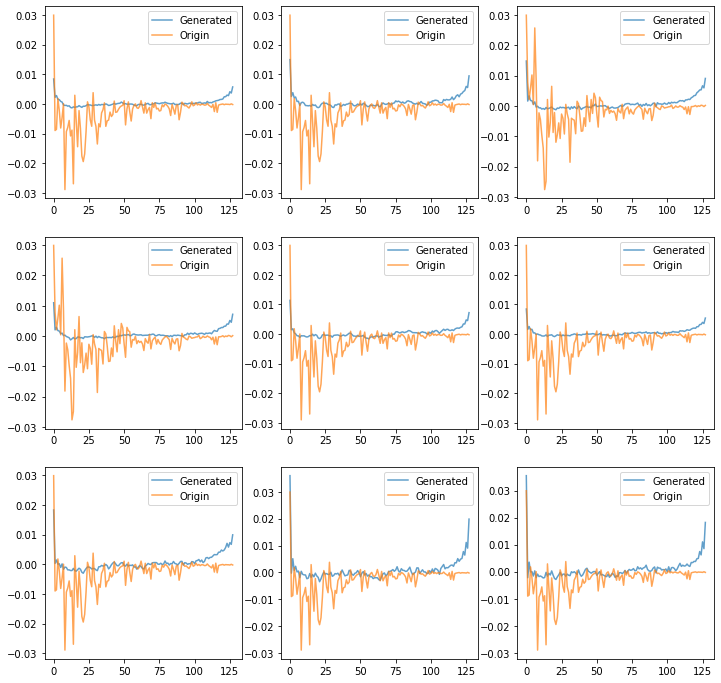

In [72]:
generated_noises = inverse(generated_norms, generated_angles)
inspect_results(generated_noises, origin_noises)

IndexError: index 60 is out of bounds for axis 0 with size 2

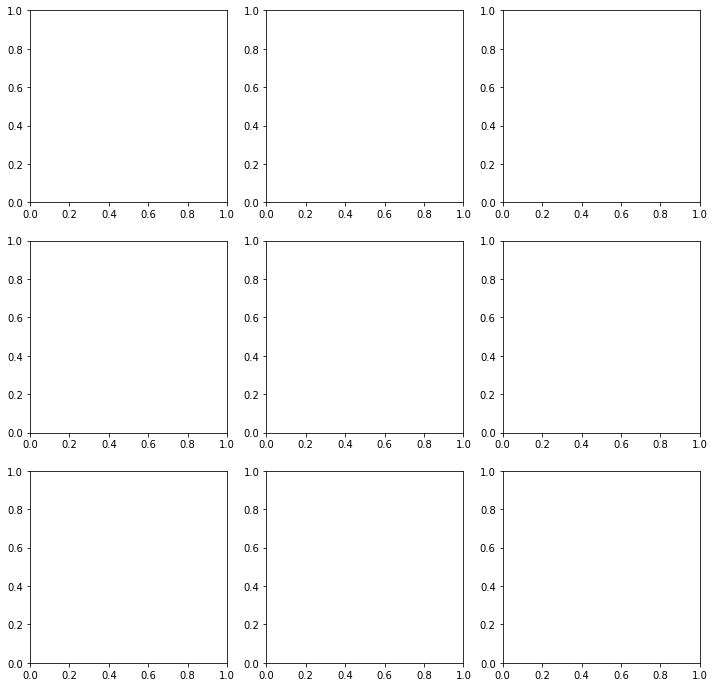

In [57]:
rows_num = 3
cols_num = 3
f, ax = plt.subplots(rows_num, cols_num, figsize=(12, 12))

for i in range(rows_num * cols_num):
    generated_noise = get_random_signal(generated_noises)
    closest_origin = get_closest(generated_noise, noises)
    ax[i // rows_num][i % cols_num].plot(generated_noise, alpha=0.7)
    ax[i // rows_num][i % cols_num].plot(closest_origin, alpha=0.7)
    ax[i // rows_num][i % cols_num].legend(['Generated', 'Origin'])
plt.show()

In [12]:
generated_noises = inverse(generated_noises)
generated_noises = scaler.unscale(generated_noises)
generated_data = np.mean(data, axis=0) + generated_noises

/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary 

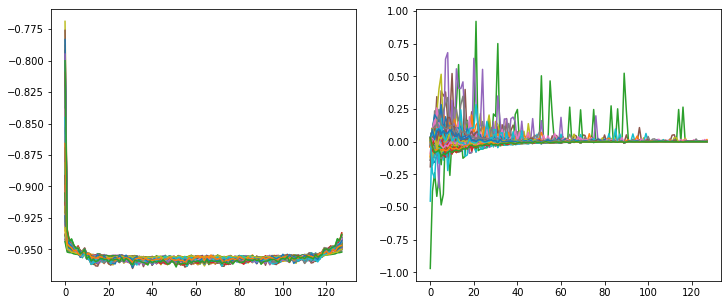

In [14]:
f, ax = plt.subplots(1, 2, figsize=(12, 5))
for noise in generated_noises:
    ax[0].plot(noise)
for noise in origin_noises:
    ax[1].plot(noise)

/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary 

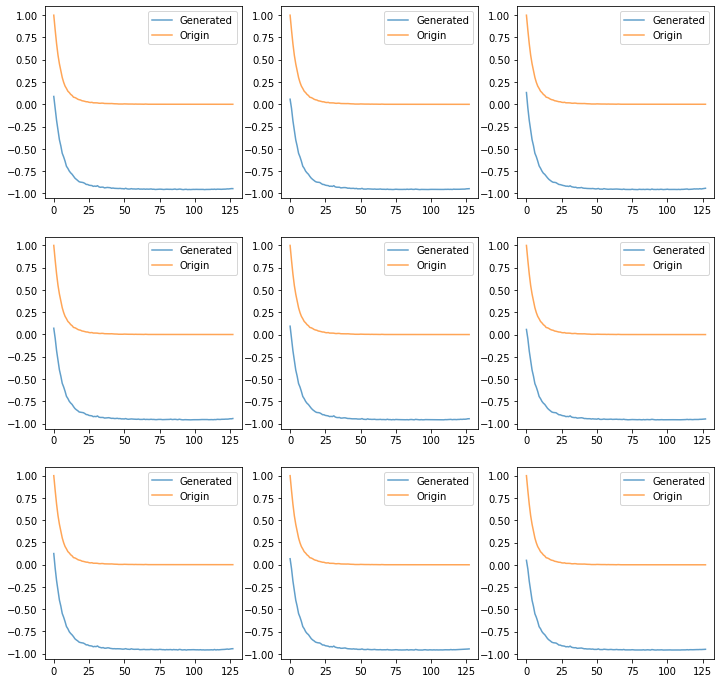

In [15]:
rows_num = 3
cols_num = 3
f, ax = plt.subplots(rows_num, cols_num, figsize=(12, 12))

for i in range(rows_num * cols_num):
    generated_signal = get_random_signal(generated_data)
    closest_origin = get_closest(generated_data, data)
    ax[i // rows_num][i % cols_num].plot(generated_signal, alpha=0.7)
    ax[i // rows_num][i % cols_num].plot(closest_origin, alpha=0.7)
    ax[i // rows_num][i % cols_num].legend(['Generated', 'Origin'])
plt.show()

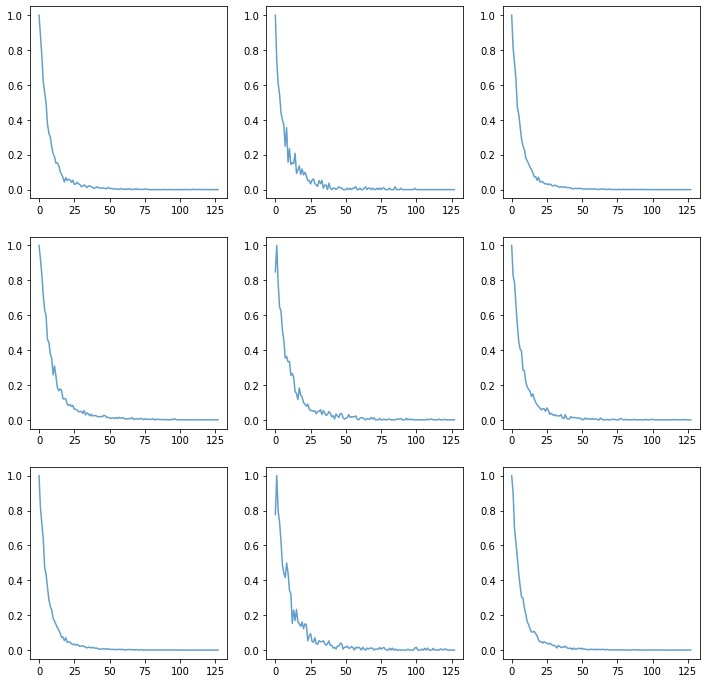

In [17]:
rows_num = 3
cols_num = 3
f, ax = plt.subplots(rows_num, cols_num, figsize=(12, 12))

for i in range(rows_num * cols_num):
#     generated_signal = generated_data)
#     closest_origin = get_closest(generated_data, data)
    ax[i // rows_num][i % cols_num].plot(get_random_signal(data), alpha=0.7)
#     ax[i // rows_num][i % cols_num].plot(closest_origin, alpha=0.7)
#     ax[i // rows_num][i % cols_num].legend(['Generated', 'Origin'])
plt.show()